In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import collections
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RandomizedLasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import (LogisticRegression, RandomizedLogisticRegression)
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [42]:
data = pd.read_csv('/Users/Sriram/Documents/Soundz_Interview_Prep/learning/springboard/capstone_project/data/bank-full.csv',delimiter=";")
data.columns
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
training_features = ['job', 'education', 'default', 'balance', 'housing','loan']
target = 'y'

In [44]:
train_x, test_x, train_y, test_y = train_test_split(data[training_features], data[target], train_size=0.7)
    
print("train_x size :: ", train_x.shape)
print("train_y size :: ", train_y.shape)
 
print("test_x size :: ", test_x.shape)
print("test_y size :: ", test_y.shape)

train_x size ::  (31647, 6)
train_y size ::  (31647,)
test_x size ::  (13564, 6)
test_y size ::  (13564,)


In [45]:
selectedcols=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in selectedcols:
    catlist='var'+'_'+var
    catlist = pd.get_dummies(data[var], prefix=var)
    data1=data.join(catlist)
    data=data1
selectedcols=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in selectedcols]

In [46]:
data_final=data[to_keep]
data_final['y'] = data_final['y'].map({'yes': 1, 'no': 0})
data_final.columns


/Users/Sriram/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [47]:
data_final_vars=list(data_final.columns.values)
Y = ['y']
X=[i for i in data_final_vars if i not in Y]
data_final.shape

(45211, 52)

In [48]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[Y])
print(rfe.support_)
print(rfe.ranking_)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False  True False  True False False  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True]
[32 34 29 31 16 33 28 26 19 11  6 25  2 22 21  1 24  7 14 17  4 27  5  9 23
 10 12  8 20  1 30  1  3 13  1 18  1  1  1  1  1 15  1  1  1  1  1  1  1  1
  1]


Using Feature selection we have taken 18 attributes for our logistic regression

In [49]:
#regularization
rlasso = RandomizedLasso(alpha=0.3)
rlasso.fit(data_final[X], data_final[Y])
names = data_final.columns
print(sorted(zip(map(lambda x: x, rlasso.scores_), names), reverse=True))

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[(0.0, 'y'), (0.0, 'previous'), (0.0, 'poutcome_success'), (0.0, 'poutcome_other'), (0.0, 'poutcome_failure'), (0.0, 'pdays'), (0.0, 'month_sep'), (0.0, 'month_oct'), (0.0, 'month_nov'), (0.0, 'month_may'), (0.0, 'month_mar'), (0.0, 'month_jun'), (0.0, 'month_jul'), (0.0, 'month_jan'), (0.0, 'month_feb'), (0.0, 'month_dec'), (0.0, 'month_aug'), (0.0, 'month_apr'), (0.0, 'marital_single'), (0.0, 'marital_married'), (0.0, 'marital_divorced'), (0.0, 'loan_yes'), (0.0, 'loan_no'), (0.0, 'job_unknown'), (0.0, 'job_unemployed'), (0.0, 'job_technician'), (0.0, 'job_student'), (0.0, 'job_services'), (0.0, 'job_self-employed'), (0.0, 'job_retired'), (0.0, 'job_management'), (0.0, 'job_housemaid'), (0.0, 'job_entrepreneur'), (0.0, 'job_blue-collar'), (0.0, 'job_admin.'), (0.0, 'housing_yes'), (0.0, 'housing_no'), (0.0, 'education_unknown'), (0.0, 'education_tertiary'), (0.0, 'education_secondary'), (0.0, 'education_primary'), (0.0, 'duration'), (0.0, 'default_yes'), (0.0, 'default_no'), (0.0, 'd

In [50]:
cols=['job_student','housing_yes','loan_yes','contact_unknown','month_aug', 'month_dec', 'month_feb','month_jan', 'month_jul','month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success','poutcome_unknown'] 
X1=data_final[cols]
Y1=data_final['y']


In [51]:
X1.head()
Y1.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [52]:
import statsmodels.api as sm
logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.304282
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45193
Method:                           MLE   Df Model:                           17
Date:                Wed, 17 Jan 2018   Pseudo R-squ.:                  0.1568
Time:                        23:27:39   Log-Likelihood:                -13757.
converged:                       True   LL-Null:                       -16315.
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
job_student          0.4880      0.084      5.789      0.000       0.323       0.653
housing_yes

We can infer that the value of p from logistic regression is zero.

In [53]:
data_final.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
lreg = logreg.fit(X_train, y_train)

In [55]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Precision score for logistic regression classifier {:.2f}'.format(precision_score(y_test, lreg.predict(X_test))))
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test, lreg.predict(X_test))))

Accuracy of logistic regression classifier on test set: 0.89
Precision score for logistic regression classifier 0.61
Recall score for logistic regression classifier 0.19


In [56]:
print(metrics.confusion_matrix(y_test, y_pred))

[[11774   195]
 [ 1289   306]]


From logisticregression we can see that predictive model for this data set is 0.89 percent accurate.

In [57]:

kfold = model_selection.KFold(n_splits=3, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("k-fold cross validation average accuracy: %.2f" % (results.mean()))

k-fold cross validation average accuracy: 0.89


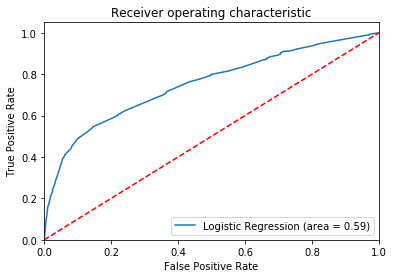

In [58]:

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [59]:
X2 = data_final[X]
Y2 = data_final[Y]


In [60]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(X2, Y2,test_size =0.3)

In [61]:
model_dt1 = DecisionTreeClassifier(max_depth = 810, criterion ="entropy")
model_dt1.fit(x_train0, y_train0)
y_pred_dt0 = model_dt1.predict_proba(x_test0)[:, 1]

In [62]:
model_dt = DecisionTreeClassifier(max_depth = 810, criterion ="gini")
model_dt.fit(x_train0, y_train0)
y_pred_dt0 = model_dt.predict_proba(x_test0)[:, 1]


In [63]:
model_dt1.feature_importances_

array([  8.02469861e-02,   1.03165856e-01,   8.05414571e-02,
         2.83440326e-01,   2.89635847e-02,   4.05183081e-02,
         1.07361424e-02,   6.87570582e-03,   5.70396143e-03,
         2.22467893e-03,   1.68740483e-03,   7.95038235e-03,
         3.04509169e-03,   2.03112493e-03,   5.85525916e-03,
         1.13719688e-03,   9.55525601e-03,   3.12258618e-03,
         1.93376334e-04,   4.63784793e-03,   8.25746186e-03,
         6.19515906e-03,   5.24338644e-03,   8.69072638e-03,
         7.64035157e-03,   2.85499467e-03,   1.31457368e-03,
         6.90102860e-04,   2.08036132e-02,   3.73548440e-03,
         3.19123494e-03,   5.49565042e-03,   2.85046686e-03,
         2.46556637e-03,   3.47403233e-02,   8.61596723e-03,
         1.31316238e-02,   1.50663902e-03,   1.15564249e-02,
         6.13561719e-03,   1.32461541e-02,   8.72206171e-03,
         8.94298265e-03,   1.01603663e-02,   1.09180870e-02,
         1.10150955e-02,   7.39423085e-03,   2.63250826e-03,
         2.61060099e-03,

In [64]:
x_train0.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [65]:
model_dt.feature_importances_

array([ 0.09299707,  0.10748798,  0.08357033,  0.26381555,  0.03143421,
        0.0463395 ,  0.01083989,  0.01123083,  0.00782551,  0.00292926,
        0.00308311,  0.00752801,  0.00234395,  0.00505115,  0.00591632,
        0.00431172,  0.00836916,  0.00190636,  0.00050375,  0.00568335,
        0.01013275,  0.00781103,  0.00493772,  0.00898536,  0.00630058,
        0.00489506,  0.00090728,  0.00118231,  0.00519174,  0.01192944,
        0.00345999,  0.00291308,  0.00359976,  0.00263522,  0.0097438 ,
        0.01762533,  0.0068438 ,  0.00344593,  0.01157716,  0.00495097,
        0.00752988,  0.01470748,  0.01346298,  0.00662562,  0.0056926 ,
        0.01149796,  0.0075989 ,  0.00347287,  0.00368206,  0.0926718 ,
        0.00082253])

In [66]:
fpr_dt, tpr_dt,_ = roc_curve(y_test0, y_pred_dt0)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [67]:
print('Precision score for Decision Tree{:.2f} '.format(precision_score(y_test0,y_pred_dt0)))
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test0, y_pred_dt0)))
print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test0, y_pred_dt0))

Precision score for Decision Tree0.48 
Recall score for Decision Tree 0.49 
Confusion Matrix for Decision Tree 
 [[11132   838]
 [  805   789]]


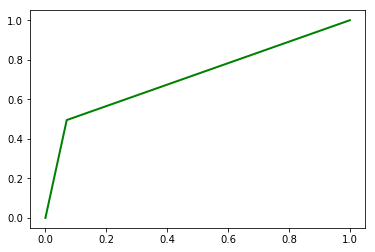

In [68]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)

In [69]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X2, Y2,test_size =0.3)

In [70]:
model_bayes = svm.SVC()

model_bayes.fit(x_train1, y_train1)
pred_bayes = model_bayes.fit(x_train1, y_train1)
y_pred_bayes = pred_bayes.decision_function(x_test1)
fprbayes, tprbayes, _= roc_curve(y_test1, y_pred_bayes)
roc_auc_bayes = auc(fprbayes, tprbayes)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
print('Precision score for SVM{:.2f} '.format(precision_score(y_test1,pred_bayes.predict(x_test1) )))
print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test1, pred_bayes.predict(x_test1)))

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision score for SVM0.00 
Confusion Matrix for SVM 
 [[11988     0]
 [ 1576     0]]


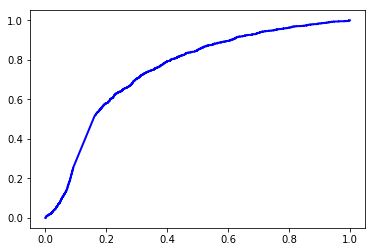

In [72]:
plt.plot(fprbayes, tprbayes, color='blue',lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes)

In [73]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2,test_size =0.3)

In [74]:
model_rf = RandomForestClassifier(max_depth = 10, n_estimators = 150)
model_pred = model_rf.fit(x_train2, y_train2)
y_pred_rf = model_rf.predict_proba(x_test2)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test2, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


/Users/Sriram/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [75]:
print('Precision score for Random forest{:.2f} '.format(precision_score(y_test2,model_pred.predict(x_test2))))
print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test2, model_pred.predict(x_test2)))

Precision score for Random forest0.75 
Confusion Matrix for Random forest 
  [[11821   125]
 [ 1236   382]]


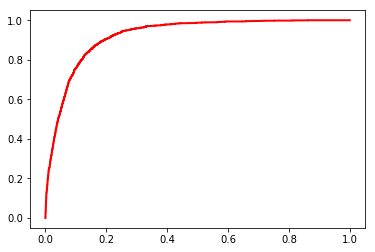

In [76]:
plt.plot(fpr_rf, tpr_rf, color='red',lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)

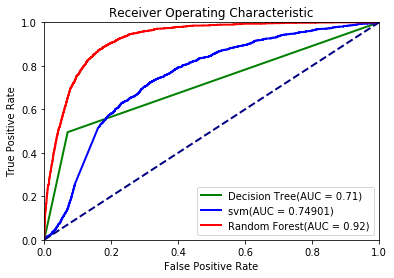

In [77]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot(fprbayes, tprbayes, color='blue',
         lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes)
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

* Logistic - Accuracy of logistic regression classifier on test set: 0.89
* Precision score for logistic regression classifier 0.60
* Decision - Precision score for Decision Tree 0.48 
* SVM - Precision score for SVM 0.33
* Random Forest - Precision score for Random forest 0.79

From the precision score its clear that Random forest has the highest score compared to other classification techniques. And Accuracy of logistic regression is higher and closer to 1


In [78]:

print("Confusion matrix \n TP FN\n")
print (" FP TN ")       
print('Confusion Matrix for Logistic regression \n', metrics.confusion_matrix(y_test, y_pred))

print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test0, y_pred_dt0))

print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test1, pred_bayes.predict(x_test1)))

print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test2, model_pred.predict(x_test2)))


Confusion matrix 
 TP FN

 FP TN 
Confusion Matrix for Logistic regression 
 [[11774   195]
 [ 1289   306]]
Confusion Matrix for Decision Tree 
 [[11132   838]
 [  805   789]]
Confusion Matrix for SVM 
 [[11988     0]
 [ 1576     0]]
Confusion Matrix for Random forest 
  [[11821   125]
 [ 1236   382]]
